# NumPy基础：数组和矢量计算
Numpy(Numerical Python)是高性能科学计算和数据分析的基础包。其主要功能包括：
- ndarray，具备矢量算术运算和复杂广播能力的多维数组
- 针对ndarray优化的标准数学函数，例如log、exp、sum等
- 线性代数、随机数生成以及傅立叶变换工具
- 用于集成由C、C++、Fortran等语言编写的代码的工具

本章的学习要点：
1. ndarray的创建
2. ndarray的数据类型
3. ndarray的基本运算
4. ndarray的索引和切片
5. ndarray的矩阵运算
6. ndarray的函数运算
7. numpy.where
8. 数学和统计方法
9. 排序和其他函数
10. 用于数组的文件输入和输出
11. 线性代数
12. 随机数生成

## 1.ndarray的创建

In [1]:
%matplotlib inline

导入numpy，按照约定俗称的惯例，numpy简称为np

In [2]:
import numpy as np

直接用二维数组创建ndarray

In [3]:
data = np.array([[0.9526, -0.246, -0.8856], [0.5639, 0.2379, 0.9104]])
data

array([[ 0.9526, -0.246 , -0.8856],
       [ 0.5639,  0.2379,  0.9104]])

In [4]:
data * 10 #对每个数组元素乘以10

array([[ 9.526, -2.46 , -8.856],
       [ 5.639,  2.379,  9.104]])

In [5]:
data.shape #获取数组的大小

(2, 3)

In [6]:
data.dtype #获取数组的类型

dtype('float64')

用一维数组也可以创建ndarray，同理用三维或者四维数组也可以创建。

In [7]:
data1 = [6, 7.5, 8, 0, 1]

In [8]:
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [9]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]

In [10]:
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [11]:
arr2.ndim #获取数组的维

2

In [12]:
arr2.shape #获取数组的大小

(2, 4)

In [13]:
arr1.dtype #数组的类型

dtype('float64')

In [14]:
arr2.dtype #数组的类型

dtype('int64')

![数组创建函数](数组创建函数.png)

In [15]:
np.zeros(10) #10个0的一维数组

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
np.zeros((3, 6)) #3x6的0元素数组

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [17]:
np.empty((2, 3, 2)) #2x3x2的0元素数组

array([[[3.10503618e+231, 3.10503618e+231],
        [2.96439388e-323, 0.00000000e+000],
        [2.14321575e-312, 5.74084271e+169]],

       [[4.22008263e-090, 2.52699646e-052],
        [8.31437362e-072, 7.49984201e-067],
        [3.99910963e+252, 8.38743383e-309]]])

In [18]:
np.arange(15) #[0,15)的整型数组

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 2. ndarray的数据类型
创建数组时用dtype参数指定数据类型，允许的数据类型如下：
![numpy的数据类型](numpy的数据类型.png)

In [19]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [20]:
arr1.dtype

dtype('float64')

In [21]:
arr2.dtype

dtype('int32')

In [22]:
arr = np.array([1, 2, 3, 4, 5]) #未指定dtype，根据数据类型推断

In [23]:
arr.dtype

dtype('int64')

In [24]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [25]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [26]:
arr.astype(np.int32) #强制类型转换

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [27]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float) #字符串转换为float

array([ 1.25, -9.6 , 42.  ])

In [28]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype) #int_array的类型转换为calibers的类型

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [29]:
empty_uint32 = np.empty(8, dtype='u4')#u4是uint32的缩写
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

**特别注意：由于ndarray有类型，因此就存在数据超界问题**

In [30]:
arr_uint8=np.array([255,255,255],dtype=np.uint8)
arr_uint8=arr_uint8+10
arr_uint8

array([9, 9, 9], dtype=uint8)

## 3.ndarray的基本运算
不用写循环，对数据进行批量运算（按位）包括：+、-、*、/、**
**注意：进行运算的两个数组必须大小相同**

In [31]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [32]:
arr * arr #按位相乘

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [33]:
arr - arr #按位减

array([[0., 0., 0.],
       [0., 0., 0.]])

In [34]:
1 / arr #按位除

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [35]:
arr ** 0.5 #按位幂

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [36]:
brr = np.array([[2., 1., 2.], [3., 2., 5.]])
arr/brr #按位除

array([[0.5       , 2.        , 1.5       ],
       [1.33333333, 2.5       , 1.2       ]])

In [37]:
arr%brr #按位求余

array([[1., 0., 1.],
       [1., 1., 1.]])

## 4.ndarray的索引和切片

In [38]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
arr[5] #索引

5

In [40]:
arr[5:8] #切片

array([5, 6, 7])

In [41]:
arr[5:8] = 12 #将子数组元素赋值为12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [42]:
arr_slice = arr[5:8] #python中=运算全部是引用

In [43]:
arr_slice[1] = 12345 #对引用的操作会反应到arr上
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [44]:
arr_slice[:] = 64 #子数组全部赋值为64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [45]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [46]:
arr2d[2] #返回第2行

array([7, 8, 9])

In [47]:
arr2d[0][2] #返回第0行第2列

3

In [48]:
arr2d[0, 2] #与上一个语法等价

3

In [49]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [50]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [51]:
arr3d[0] #返回第0行

array([[1, 2, 3],
       [4, 5, 6]])

In [52]:
old_values = arr3d[0].copy() #copy构造第0行的副本

In [53]:
arr3d[0] = 42 #第0行全部赋值为42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [54]:
old_values #old_values因为是副本，所以不变

array([[1, 2, 3],
       [4, 5, 6]])

In [55]:
arr3d[0] = old_values #将old_values重新拷贝回去
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [56]:
arr3d[1, 0] #返回第1行第0列

array([7, 8, 9])

In [57]:
arr[1:6] #切片索引，返回1-5行

array([ 1,  2,  3,  4, 64])

In [58]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [59]:
arr2d[:2] #返回0-1行

array([[1, 2, 3],
       [4, 5, 6]])

In [60]:
arr2d[:2, 1:] #返回0-1行，1-最后列

array([[2, 3],
       [5, 6]])

In [61]:
arr2d[1, :2] #返回1行，0-1列

array([4, 5])

In [62]:
arr2d[2, :1] #返回2行，0列

array([7])

In [63]:
arr2d[:, :1] #返回所有行，0列

array([[1],
       [4],
       [7]])

In [64]:
arr2d[:2, 1:] = 0 #0-1行，1-最后列全部为0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

布尔型索引

In [65]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [66]:
names == 'Bob' #布尔索引

array([ True, False, False,  True, False, False, False])

In [67]:
names[names=='Bob'] #返回等于Bob的数据

array(['Bob', 'Bob'], dtype='<U4')

In [68]:
np.where(names=='Bob') #返回等于Bob的数据索引

(array([0, 3]),)

In [69]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [70]:
names[mask]

array(['Bob', 'Will', 'Bob', 'Will'], dtype='<U4')

In [71]:
from numpy.random import randn
ratings=randn(7) #假设ratings中的值与names对应
ratings

array([ 0.17108385,  0.74688821, -1.17827722,  1.43761201, -0.13297569,
        1.1868147 , -0.51424532])

In [72]:
ratings[mask] #取mask对应的ratings

array([ 0.17108385, -1.17827722,  1.43761201, -0.13297569])

In [73]:
np.where(mask)

(array([0, 2, 3, 4]),)

花式索引

In [74]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i

In [75]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [76]:
arr[[4, 3, 0, 6]] #用数组做索引

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [77]:
arr[[-3, -5, -7]] #负值索引

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [78]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [79]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]] #根据数组取特定的行列

array([ 4, 23, 29, 10])

In [80]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [81]:
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

**注意：索引和切片虽然便利，但不要使用过于复杂的方法。源代码的可读性对软件项目极为重要！**

## 5.ndarray的矩阵运算

In [82]:
arr = np.arange(15).reshape((3, 5)) #将15个元素的1维数组变为3x5的2维
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [83]:
arr.T #数组（矩阵）转置

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [84]:
arr = np.random.randn(6, 3)

In [85]:
np.dot(arr.T, arr) #数组内积（矩阵乘法）

array([[ 6.71443986, -3.24979184, -1.91745336],
       [-3.24979184,  5.01112153,  1.55605214],
       [-1.91745336,  1.55605214,  2.4196503 ]])

In [86]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [87]:
arr.transpose((1, 0, 2)) #高维数组转置（没看懂就算了，不常用）

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [88]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [89]:
arr.swapaxes(1, 2) #轴对换

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## 6. ndarray的函数运算

In [90]:
arr = np.arange(10)

In [91]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [92]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [93]:
x = randn(8)

In [94]:
y = randn(8)

In [95]:
x

array([-0.12526293, -0.76564732,  2.04669248,  1.8033192 , -0.37486028,
        0.41850041,  0.77291334,  0.81324933])

In [96]:
y

array([ 0.05771647, -0.20122632,  0.60756146, -1.88983443,  0.96417683,
        0.89056906,  0.57357482, -0.90499784])

In [97]:
np.maximum(x, y)

array([ 0.05771647, -0.20122632,  2.04669248,  1.8033192 ,  0.96417683,
        0.89056906,  0.77291334,  0.81324933])

In [98]:
arr = randn(7) * 5

In [99]:
np.modf(arr)

(array([ 0.96452846, -0.36258402, -0.30969548, -0.81826447,  0.14441715,
         0.62072353,  0.99140582]), array([ 3., -2., -0., -2.,  1.,  7.,  4.]))

![一元ufunc](一元ufunc.png)
![二元ufunc](二元ufunc.png)

利用数组进行数据处理

In [100]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points

In [101]:
xs, ys = np.meshgrid(points, points) #产生1000x1000的值对
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [102]:
import matplotlib.pyplot as plt

In [103]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

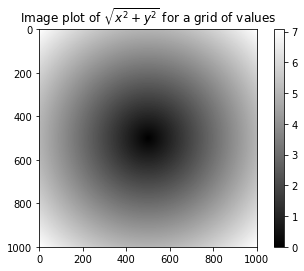

In [104]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

## 7.numpy.where

In [105]:
xarr=np.random.randn(10)
xarr>0.5


array([False,  True,  True, False, False, False,  True, False, False,
       False])

In [106]:
np.where(xarr>0.5)

(array([1, 2, 6]),)

In [107]:
np.where(xarr>0.5,'大于0.5','小于0.5')

array(['小于0.5', '大于0.5', '大于0.5', '小于0.5', '小于0.5', '小于0.5', '大于0.5',
       '小于0.5', '小于0.5', '小于0.5'], dtype='<U5')

## 8.数学和统计方法

In [108]:
arr = np.random.randn(5, 4) # 正态分布随机数
arr

array([[-0.16363661,  0.62872522,  0.02464877, -2.01579922],
       [-0.23221692,  1.6942235 , -1.31908516,  0.86720242],
       [-1.70204671,  0.3053794 ,  1.70070121,  0.5884558 ],
       [ 0.76859829, -3.03655211, -0.99739175, -1.25728044],
       [ 1.44691591, -0.40078104,  0.26061735,  0.20069289]])

In [109]:
arr.mean() #均值

-0.1319314601692285

In [110]:
np.mean(arr)

-0.1319314601692285

In [111]:
arr.sum() #求和

-2.63862920338457

In [112]:
arr.mean(axis=1) #每列的均值

array([-0.38151546,  0.25253096,  0.22312242, -1.1306565 ,  0.37686128])

In [113]:
arr.sum(0) #按列求和

array([ 0.11761396, -0.80900503, -0.33050957, -1.61672856])

In [114]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [115]:
arr.cumsum(0) #元素的累计和

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [116]:
arr.cumprod(1) #元素的累计积

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

![基本数组统计方法](基本数组统计方法.png)

## 9.排序和其他函数

In [117]:
arr = randn(100)
(arr > 0).sum() # Number of positive values

46

In [118]:
bools = np.array([False, False, True, False])
bools.any() #数组中是否有元素为True

True

In [119]:
bools.all() #数组中是否所有元素都为True

False

In [120]:
arr = randn(8)
arr

array([ 0.82398614, -1.56054858,  0.32522447, -1.45346989, -0.89218001,
        0.04259519, -1.36476932,  0.16127263])

In [121]:
arr.sort() #排序
arr

array([-1.56054858, -1.45346989, -1.36476932, -0.89218001,  0.04259519,
        0.16127263,  0.32522447,  0.82398614])

In [122]:
arr = randn(5, 3)
arr

array([[-0.81642219,  0.77062423, -0.8205605 ],
       [-1.26323144,  0.5621476 ,  0.81132036],
       [ 0.15157293,  0.47166136, -0.69838128],
       [ 0.11276624, -0.64204933, -0.10646497],
       [ 0.04015929,  1.21150406, -0.17157299]])

In [123]:
arr.sort(1) #对列进行排序
arr

array([[-0.8205605 , -0.81642219,  0.77062423],
       [-1.26323144,  0.5621476 ,  0.81132036],
       [-0.69838128,  0.15157293,  0.47166136],
       [-0.64204933, -0.10646497,  0.11276624],
       [-0.17157299,  0.04015929,  1.21150406]])

In [124]:
large_arr = randn(1000)
large_arr.sort()

In [125]:
large_arr[int(0.05 * len(large_arr))] # 5%分位数（正好位于5%的数字）

-1.6972434595711727

In [126]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])


In [127]:
np.unique(names) #唯一化

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [128]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [129]:
np.unique(ints) #唯一化

array([1, 2, 3, 4])

In [130]:
sorted(set(names)) #唯一化

['Bob', 'Joe', 'Will']

In [131]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [132]:
np.in1d(values, [2, 3, 6]) #values中是否包含[2,3,6]

array([ True, False, False,  True,  True, False,  True])

![数组的集合运算](数组的集合运算.png)

## 10.用于数组的文件输入输出

### 将数组以二进制格式保存到磁盘

In [133]:
arr = np.arange(10)
np.save('some_array', arr) #自动加上扩展名.npy
#默认生成.npy文件

In [134]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [135]:
np.savez('array_archive.npz', a=arr, b=arr) #将多个数组压缩到一个文件

In [136]:
arch = np.load('array_archive.npz')

In [137]:
arch['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [138]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 存取文本文件

In [139]:
!cat array_ex.txt

0.580052,0.186730,1.040717,1.134411
0.194163,-0.636917,-0.938659,0.124094
-0.126410,0.268607,-0.695724,0.047428
-1.484413,0.004176,-0.744203,0.005487
2.302869,0.200131,1.670238,-1.881090
-0.193230,1.047233,0.482803,0.960334


In [140]:
arr = np.loadtxt('array_ex.txt', delimiter=',')
arr

array([[ 0.580052,  0.18673 ,  1.040717,  1.134411],
       [ 0.194163, -0.636917, -0.938659,  0.124094],
       [-0.12641 ,  0.268607, -0.695724,  0.047428],
       [-1.484413,  0.004176, -0.744203,  0.005487],
       [ 2.302869,  0.200131,  1.670238, -1.88109 ],
       [-0.19323 ,  1.047233,  0.482803,  0.960334]])

## 11.线性代数

In [141]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [142]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [143]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [144]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [145]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [146]:
from numpy.linalg import inv, qr #线性代数运算在numpy.linalg库中

In [147]:
X = randn(5, 5)
mat = X.T.dot(X) #矩阵相乘

In [148]:
inv(mat) #矩阵求逆

array([[ 0.20780082,  0.03057514,  0.2892586 ,  0.0271419 , -0.30672315],
       [ 0.03057514,  1.09549394,  0.44119809, -0.20107845, -2.76380962],
       [ 0.2892586 ,  0.44119809,  1.53069175,  0.01143229, -2.27261549],
       [ 0.0271419 , -0.20107845,  0.01143229,  0.20398654,  0.60279741],
       [-0.30672315, -2.76380962, -2.27261549,  0.60279741,  8.49148413]])

In [149]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  5.55111512e-17, -1.11022302e-16,
         1.38777878e-17,  0.00000000e+00],
       [ 2.22044605e-16,  1.00000000e+00,  1.77635684e-15,
        -4.44089210e-16,  0.00000000e+00],
       [ 1.11022302e-16, -8.88178420e-16,  1.00000000e+00,
        -4.44089210e-16, -1.77635684e-15],
       [ 0.00000000e+00,  1.77635684e-15,  8.88178420e-16,
         1.00000000e+00,  8.88178420e-16],
       [ 2.22044605e-16,  0.00000000e+00,  8.88178420e-16,
         0.00000000e+00,  1.00000000e+00]])

In [150]:
q, r = qr(mat)#qr分解
r

array([[ -6.88318643,  -1.29477549,   1.00049836,   1.65044265,
         -0.52194359],
       [  0.        , -15.59547738,  -7.28388428,   9.45674811,
         -7.74053627],
       [  0.        ,   0.        ,  -1.73112951,   5.88571202,
         -0.88561256],
       [  0.        ,   0.        ,   0.        ,  -4.18070258,
          0.28223792],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.10823235]])

In [151]:
np.linalg.cholesky(mat) #乔姆斯基分解

array([[ 2.5914154 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.20391488,  3.55480085,  0.        ,  0.        ,  0.        ],
       [-0.46277202,  1.41392742,  1.16460105,  0.        ,  0.        ],
       [-0.28423063, -1.40777247, -1.24816959,  2.49071697,  0.        ],
       [ 0.05629872,  1.63536874,  0.40029325, -0.17681217,  0.34316912]])

In [152]:
np.linalg.eig(mat)#特征值分解

(array([21.59825347,  7.17221155,  5.99123703,  0.91345188,  0.09918597]),
 array([[-0.02618642, -0.91992581,  0.31138404,  0.23395428, -0.03682597],
        [-0.70906772,  0.11515654,  0.51624525, -0.36026791, -0.29607402],
        [-0.33938486,  0.22372967, -0.05510338,  0.87415615, -0.25995691],
        [ 0.50165185,  0.29750345,  0.78818034,  0.18660531,  0.06154132],
        [-0.36013968,  0.0437288 ,  0.11075287,  0.12845976,  0.91630732]]))

In [153]:
U,S,Vt=np.linalg.svd(mat) #奇异值分解
S

array([21.59825347,  7.17221155,  5.99123703,  0.91345188,  0.09918597])

## 12.随机数生成

In [154]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 1.77135993,  1.27363976,  0.05539354,  0.647901  ],
       [ 1.35312572,  0.45954479,  1.60332827, -1.42923684],
       [-0.76376158, -0.80338419,  0.39000721,  0.27455879],
       [-1.42492269,  2.39585293,  0.90084078, -0.45288205]])

![random函数](random.png)

## 范例：随机漫步

In [155]:
import random 
position = 0
walk = [position] 
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

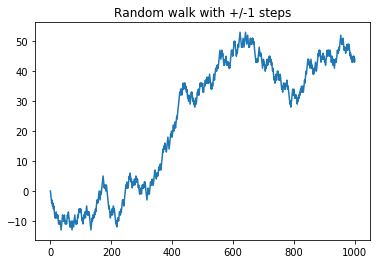

In [156]:
from matplotlib import  pyplot
pyplot.plot(walk)
pyplot.title('Random walk with +/-1 steps')

In [157]:
nsteps = 1000

In [158]:
draws = np.random.randint(0, 2, size=nsteps)

In [159]:
steps = np.where(draws > 0, 1, -1)

In [160]:
walk = steps.cumsum()

In [161]:
walk.min()

-16

In [162]:
walk.max()

36

In [163]:
(np.abs(walk) >= 10).argmax()

23

### 一次模拟多个随机漫步

In [164]:
nwalks = 5000
nsteps = 1000

In [165]:
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1

In [166]:
steps = np.where(draws > 0, 1, -1)

In [167]:
walks = steps.cumsum(1)
walks

array([[ -1,  -2,  -1, ...,   8,   7,   8],
       [  1,   0,   1, ...,   2,   3,   2],
       [ -1,   0,   1, ...,  -2,  -1,   0],
       ...,
       [  1,   0,  -1, ..., -34, -33, -34],
       [  1,   0,   1, ..., -24, -23, -22],
       [ -1,  -2,  -3, ...,  44,  45,  44]])

In [168]:
walks.max()

106

In [169]:
walks.min()

-124

In [170]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True, False, False, ...,  True,  True,  True])

In [171]:
hits30.sum() # Number that hit 30 or -30

3405

In [172]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

In [173]:
crossing_times.mean()

502.6187958883994

In [174]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))